In [6]:
import numpy as np
import sys
sys.path.append('../../python')
import plot_info
import matplotlib.pyplot as plt
plot_info.set_notebook_name('WassersteinRuntime.ipynb')
import ot
import time

sample_number = 16
sample_number = 32
sample_number = 64
sample_number = 128
sample_number = 256
sample_number = 512
sample_number = 1024
sample_number = 2048
sample_number = 4096
sample_number = 8192
sample_number = 16384




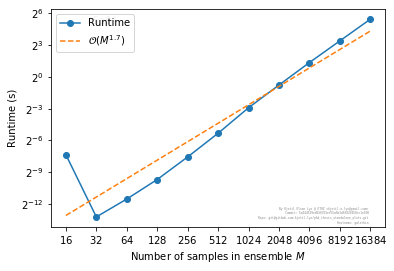

In [27]:

# Measure runtime (in seconds) as a function of number of samples

sample_numbers = 2**np.arange(4, 15)
retries = 10

runtimes = np.zeros((len(sample_numbers), retries))

for n, sample_number in enumerate(sample_numbers):
    print(f'sample_number = {sample_number}')
    weights = np.ones(sample_number)/sample_number
    for retry in range(retries):
        x1 = np.random.uniform(0,1, (sample_number, 1))
        x2 = np.random.uniform(0,1, (sample_number, 1))
        cost_matrix = ot.dist(x1, x2, metric='euclidean')
        
        start = time.time()
        
        assignment = ot.emd(weights, weights, cost_matrix)
        
        end = time.time()
        
        runtimes[n, retry] = end-start
        
        
mean_runtimes = np.mean(runtimes, axis=1)
std_runtimes = np.std(runtimes, axis=1)

plt.loglog(sample_numbers, mean_runtimes, '-o', label='Runtime')

poly = np.polyfit(np.log(sample_numbers), np.log(mean_runtimes), 1)
plt.loglog(sample_numbers, np.exp(poly[1])*sample_numbers**poly[0], '--',
           label=f'$\\mathcal{{O}}(M^{{{poly[0]:.1f}}})$')

plt.legend()

plt.ylabel("Runtime (s)")
plt.xlabel("Number of samples in ensemble $M$")

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)

plt.xticks(sample_numbers, [f'${M}$' for M in sample_numbers])
        
plot_info.showAndSave('wasserstein_runtime')

In [28]:
print(mean_runtimes[sample_numbers==1024]*1024**(3*2)/60/60/24/365)

[4.82792066e+09]


In [29]:
print(mean_runtimes[sample_numbers==1024]*1024**(3*2)/60/60*0.0255)

[1.07846092e+12]
